# Create data set 

STEP 0 :Importation 

In [1]:
import random  # for generating  data set 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # for visualization

 STEP 1 : We will generate randomly our dataset by the first function generate(), than we will use SABR for labeling
 
We will generate 1000 samples and 7 feature variables in this dataset. The objective is to predict the value of volatility (our target) using the differents features.

    • alpha =  instantaneous volatility [5%, 25%] / F^(beta – 1)
    • beta = [0.10, 0.80] (CEV component for the forward rate)
    • nu = [20%, 80%] (volatility of volatility)
    • rho = [-40%, 40%] (correlation coefficient)
    • F = [2%, 4%] (forward interest rate)
    • K = [1%, 6%] (option strike)
    • T = [1 month, 5 years] (option maturity)
    
    

In [2]:
def generate():
    
    random.seed(1)
    # initialisation of our arrays 
    tab_beta=[]
    tab_nu=[]
    tab_rho=[]
    tab_F=[]
    tab_K=[]
    tab_T=[]
    tab_alpha=[]
    
    # creation of 1000 observation 
    
    for i in range (1000):
        tab_beta.append((random.uniform(0.1,0.8)))
        tab_nu.append((random.uniform(0.2,0.8)))
        tab_rho.append((random.uniform(-0.4,0.4)))
        tab_F.append((random.uniform(0.02,0.04)))
        tab_K.append((random.uniform(0.01,0.06)))
        tab_T.append((random.randint(5,60))/12)  
       
    for (i,j) in zip(tab_beta,tab_F):
    
        tab_alpha.append(random.uniform(0.05,0.06)/(j**(i-1)))
        
    return tab_alpha,tab_beta,tab_nu,tab_rho,tab_F,tab_K,tab_T

In [3]:
def SABR(alpha, beta, nu, rho, F, K, T):
    eps_SABR = 0.0001
    V = (F * K)**((1.0 - beta) / 2.0)
    logFK = np.log(F / K)
    tmp1 = nu * nu * (2.0 - 3.0 * rho * rho) / 24.0
    tmp1 += rho * beta * nu * alpha / (V * 4.0)
    tmp1 += (1.0 - beta) * (1.0 - beta) * alpha * alpha / ((V**2) * 24.0)
    tmp1 = alpha * (1.0 + (tmp1 * T))
    tmp2 = V * (1.0 + np.power(logFK * (1.0 - beta), 2.0) / 24.0 +
    np.power(logFK * (1.0 - beta), 4.0) / 1920.0)
    z = nu / alpha * V * logFK
    def chi(z):
        eps_SABR = 0.0001
        tmp1 = np.sqrt(1.0 - 2.0 * rho * z + z * z)
        np.where(abs(z) < eps_SABR, z, z)
        z = np.where((tmp1 + z - rho > 0.0),
        np.log((tmp1 + z - rho) / (1.0 - rho)),
        np.log((1.0 + rho) / (tmp1 - (z - rho))))
        return z
    chi_z = chi(z)
    vol = np.where(abs(F - K) > eps_SABR, tmp1 / tmp2 * z / chi_z,
    tmp1 / np.power(F, 1.0 - beta))
    return vol

In [4]:
# calling generate()

tab_alpha,tab_beta,tab_nu,tab_rho,tab_F,tab_K,tab_T = generate()

# labeling of data
vola=[]
for (alpha, beta, nu, rho, F, K, T) in zip(tab_alpha,tab_beta,tab_nu,tab_rho,tab_F,tab_K,tab_T):
    vola.append((SABR(alpha, beta, nu, rho, F, K, T)))



STEP 3 : Transformation of our arrays to a dataframe using pandas 

In [5]:
dff=pd.DataFrame(vola,columns=['vola'])
dff["rho"]=tab_rho
dff["nu"]=tab_nu
dff["F"]=tab_F
dff["K"]=tab_K
dff["T"]=tab_T
dff["alpha"]=tab_alpha
dff["beta"]=tab_beta

In [6]:
#preview of our dataset 
dff.head(10) 

,vola,rho,nu,F,K,T,alpha,beta
0,0.121974,0.211020,0.708460,0.025101,0.034772,2.750000,0.002907,0.194055
1,0.098254,-0.232036,0.427769,0.029757,0.054666,2.416667,0.006937,0.430572
2,0.108195,-0.398315,0.657368,0.028908,0.046077,1.583333,0.007013,0.402937
3,0.081849,-0.146056,0.261336,0.020446,0.042477,0.416667,0.007709,0.513807
4,0.162311,-0.226720,0.428723,0.028442,0.011452,1.583333,0.021557,0.757404
5,0.173273,0.042288,0.763500,0.026914,0.043842,4.416667,0.015515,0.634591
6,0.051181,-0.382808,0.373869,0.036752,0.037823,3.833333,0.007661,0.421722
7,0.142804,0.178911,0.577612,0.025928,0.047157,4.250000,0.002582,0.170000
8,0.140828,0.373768,0.500480,0.030154,0.055509,1.416667,0.025561,0.781277
9,0.062091,0.305983,0.552548,0.036924,0.035264,3.500000,0.006076,0.312358


The volatility indicated by the variable [vola] is our target variable and the remaining are the feature variables based on which we will predict the value of on which we will predict the value of  .

In [7]:
# data describtion 
dff.describe()

,vola,rho,nu,F,K,T,alpha,beta
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.106687,0.003781,0.501508,0.029605,0.035549,2.723750,0.009851,0.445740
std,0.045516,0.236420,0.172411,0.005813,0.014008,1.313377,0.006740,0.199583
min,0.048323,-0.398530,0.200934,0.020018,0.010169,0.416667,0.001683,0.100155
25%,0.071529,-0.208528,0.350753,0.024453,0.023397,1.666667,0.004277,0.280832
50%,0.094228,0.014338,0.501427,0.029360,0.034899,2.750000,0.007712,0.442782
75%,0.128782,0.211827,0.652857,0.034546,0.047935,3.833333,0.014627,0.621872
max,0.319344,0.396627,0.798926,0.039992,0.059942,5.000000,0.029554,0.799388


# DATA processing 

We see if there are any missing values in our data. We will count the number of missing values for each feature using isnull()

In [8]:
# checking if there is any missing data 
dff.isnull().sum()

vola     0
rho      0
nu       0
F        0
K        0
T        0
alpha    0
beta     0
dtype: int64

However, there are no missing values in our dataset.

# Exploratory Data Analysis

STEP 1 : We will use the distplot function from the seaborn library in order to plot the distribution of the target variable vola.

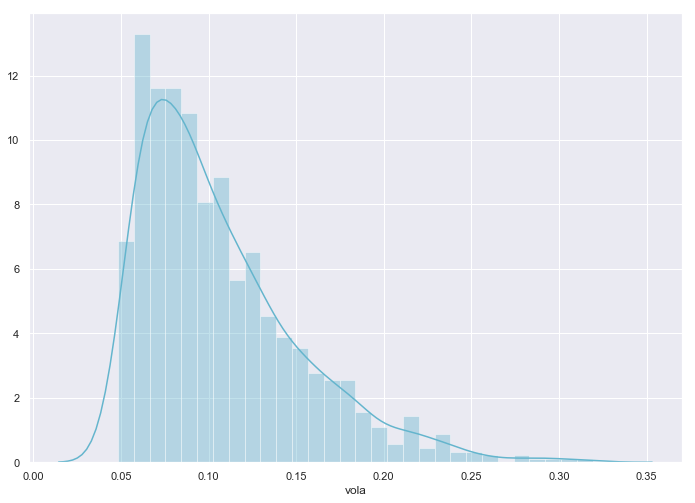

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dff['vola'], color='c' ,bins=30)
plt.show()

- We see that the values of vola are distributed normally with few outliers.

STEP 2 :  Creating a correlation matrix that measures the linear relationships between the variables

- We will use the corr function from the pandas dataframe library and the heatmap function from the seaborn library to plot the correlation matrix

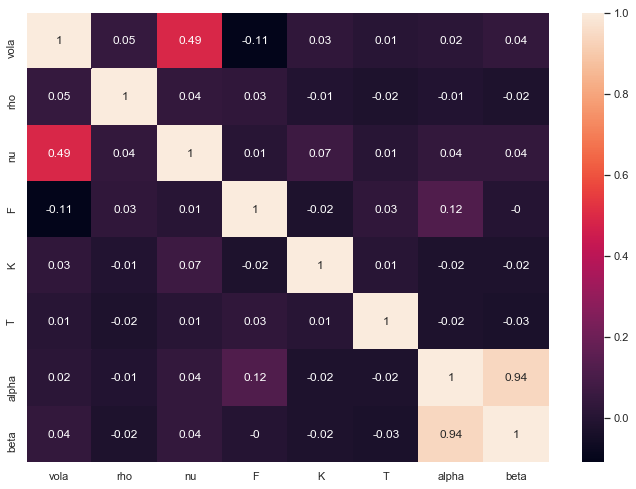

In [10]:
correlation_matrix = dff.corr().round(2)
# annot = True is to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

By looking at the correlation matrix we can see that {nu} has a strong positive correlation with {vola}, so we will plot {nu} to sse how it varies with {vola}

Text(0,0.5,'vola')

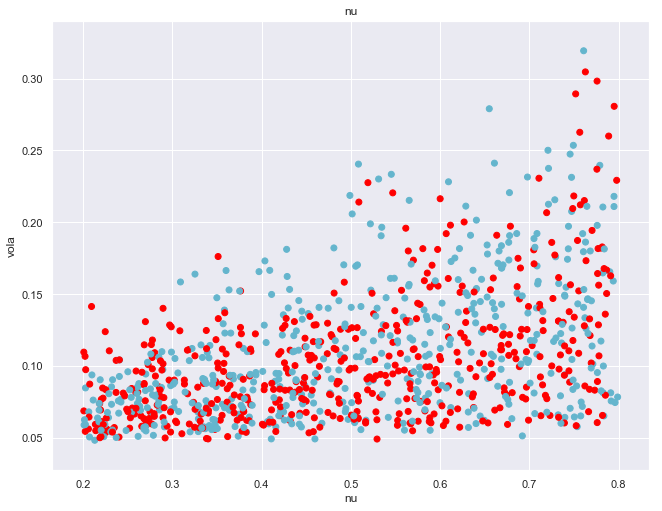

In [11]:
plt.figure(figsize=(10.7,8.27))
x = dff['nu']
y =dff.vola
plt.scatter(x, y, marker='o', color=['c','red'])
plt.title('nu')
plt.xlabel('nu')
plt.ylabel('vola')

# Saving dataset

In [13]:
# saving our data in a csv 
path=input('please input your path :')
dff.to_csv(path,  index = None, header=True)

please input your path :C:/Users/Dell 7470/Desktop/test_xcelerit/data_xcelerit.csv
